<a href="https://colab.research.google.com/github/Herawisp/Scientific_Computing_LAB/blob/main/SC-Sesi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Catatan

---

Gaussian-Seidel Method

Solve the following system of linear equations using Gauss-Seidel method, use a pre-defined threshold 𝜖 = 0.01. Do remember to check if the convergence condition is satisfied or not.

8x + 3y - 3z = 14

-2x - 8y + 5z = 5

3x + 5y + 10z = -8

---
Step #1

Let us first check if the coefficient matrix is diagonally dominant or not.

In [36]:
import numpy as np
a = [
    [8, 3, -3],
    [-2, -8, 5],
    [3, 5, 10]
]

diag = np.diag(np.abs(a))
print(diag)
off_diag = np.sum(np.abs(a), axis=1) - diag

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

[ 8  8 10]
matrix is diagonally dominant


---
Step #2

Since it is guaranteed to converge, we can use Gauss-Seidel method to solve it.

In [37]:
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False

x_old = np.array([x1, x2, x3])


Create your own Gauss-Seidel Solver

In [38]:
print('Iteration results')
print(' k,    x1,    x2,    x3 ')

for k in range(1, 50):
    x1 = (14 - 3*x2 + 3*x3) / 8
    x2 = (5 + 2*x1 - 5*x3) / (-8)
    x3 = (-8 - 3*x1 - 5*x2) / 10

    x = np.array([x1, x2, x3])

    dx = np.sqrt(np.dot(x - x_old, x - x_old))

    print("%d, %.4f, %.4f, %.4f" % (k, x1, x2, x3))

    if dx < epsilon:
        converged = True
        print('Converged!')
        break

    x_old = x

if not converged:
    print('Not converge, increase the # of iterations')

Iteration results
 k,    x1,    x2,    x3 
1, 1.7500, -1.0625, -0.7937
2, 1.8508, -1.5838, -0.5633
3, 2.1327, -1.5103, -0.6847
4, 2.0596, -1.5678, -0.6340
5, 2.1002, -1.5463, -0.6569
6, 2.0835, -1.5565, -0.6468
7, 2.0911, -1.5520, -0.6513
Converged!


---
**Use numpy.linalg.solve**

Use numpy.linalg.solve to solve the folloeing equations.

4x + 3y - 5z = 2

-2x - 4y + 5z = 5

8x + 8y = -3



In [39]:
import numpy as np

A = np.array([[4, 3, -5],
              [-2, -4, 5],
              [8, 8, 0]])

y = np.array([2, 5, -3])

x = np.linalg.solve(A, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


---
Using the matrix inversion approach

In [40]:
A__inv = np.linalg.inv(A)

x = np.dot(A__inv, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


---
**Least Squares Regression in Python**

Use direct inverse method

In [41]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)), y)
print(alpha)

[[1.44905445]
 [1.02467256]]


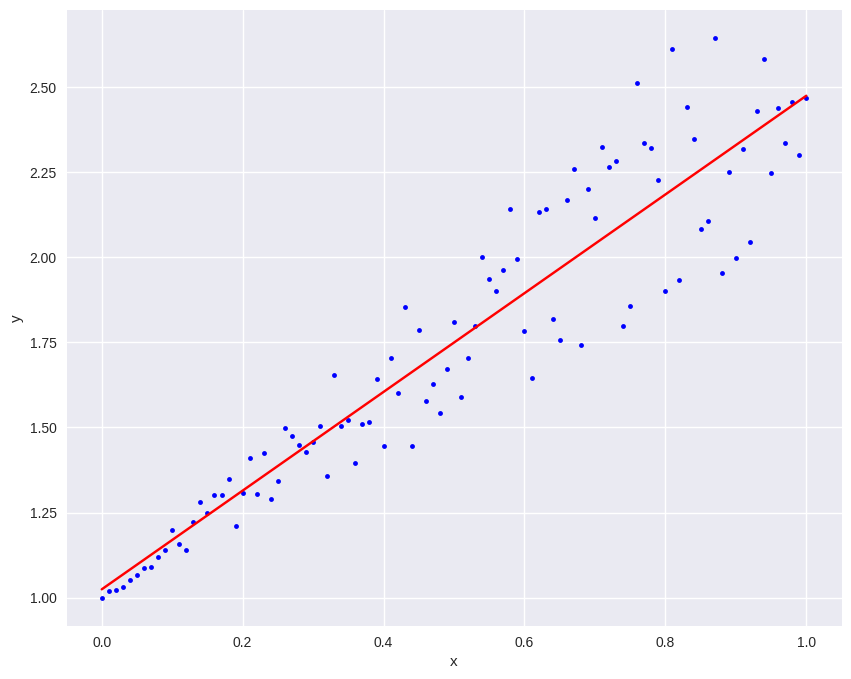

In [42]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

---
Use the pseudoinverse

In [43]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.44905445]
 [1.02467256]]


---
Use numpy.linalg.lstsq

In [44]:
alpha = np.linalg.lstsq(A, y)[0]
print(alpha)

[[1.44905445]
 [1.02467256]]


<ipython-input-44-82c30f1ca2a6>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  alpha = np.linalg.lstsq(A, y)[0]


---
Use optimize.curve_fit from scipy

In [45]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, x, y)[0]
print(alpha)

[1.52435615 0.99146974]


---
**Pandas and Matplotlib library**

Matlplotlib is the most important package to make a plot.

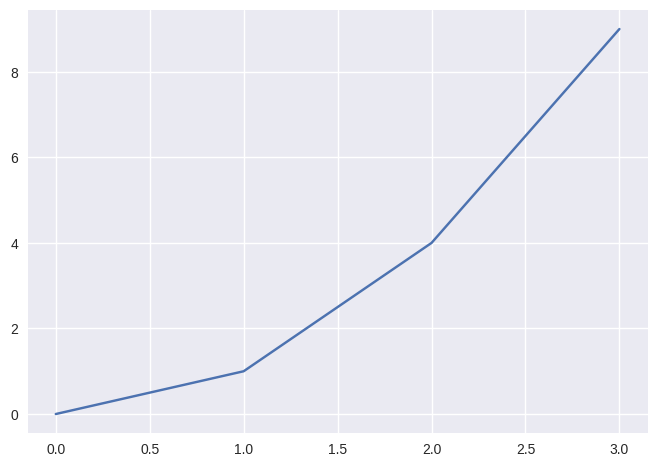

In [46]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 2, 3]
y = [0, 1, 4, 9]
plt.plot(x, y)
plt.show()

---
Pandas

*   Pandas is a Python library used for working with data sets
*   It has functions for analyzing, cleaning, exploring, and manipulating data.
*   The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" and was created by Wes McKinney in 2008






<Axes: >

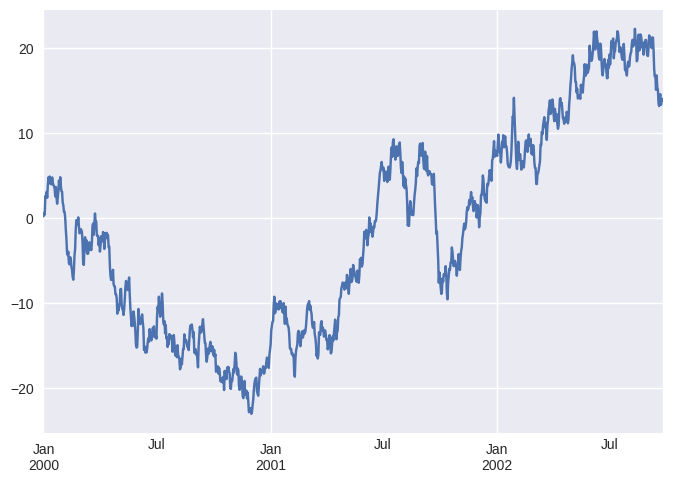

In [47]:
import pandas as pd
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Axes: >

<Figure size 800x550 with 0 Axes>

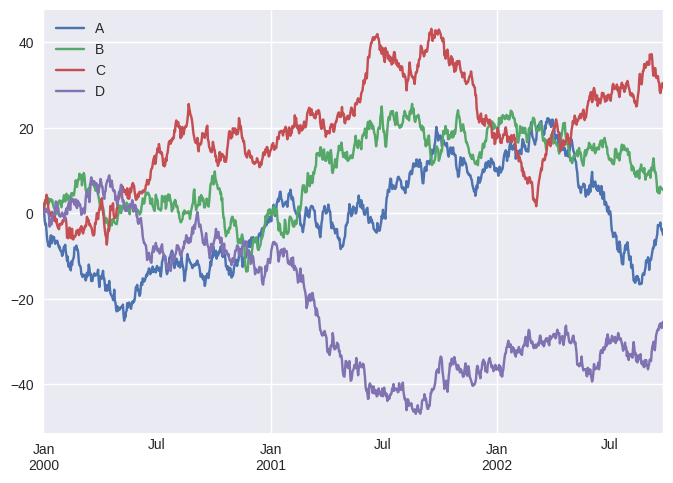

In [48]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()

# Modul

---
1. Diketahui persamaan berikut:
*   2x + 3y -z = 10
*   x - y + 2z = 4
*   3x + 2y + z = 14

  a). Tentukan nilai x, y, z dengan metode Gauss Seidel. Gunakan nilai initial: x = 5, y = 5, z = 5 dengan error tolerance = 0.001

In [73]:
import numpy as np

a = np.array([[2, 3, -1],
              [1, -1, 2],
              [3, 2, 1]])

diag = np.diag(np.abs(a))
off_diag = np.sum(np.abs(a), axis=1) - diag

if np.all(diag > off_diag):
    print('Matrix is diagonally dominant')
else:
    print('Matrix is NOT diagonally dominant')

Matrix is NOT diagonally dominant


karena matriks koefisien dalam sistem yang diberikan tidak diagonally dominant, maka kita tidak dapat konvergensi metode iteratif ini. Tapi jika tetap dilanjutkan, ini hasilnya:

In [74]:
x1 = 5
x2 = 5
x3 = 5
epsilon = 0.001
converged = False

x_old = np.array([x1, x2, x3])

print('Iteration results')
print(' k,    x1,    x2,    x3 ')

for k in range(1, 20):
    x1 = (10 - 3*x2 + x3) / 2
    x2 = (4 - x1 - 2*x3) / (-1)
    x3 = (14 - 3*x1 - 2*x2) / 1

    x = np.array([x1, x2, x3])

    dx = np.sqrt(np.dot(x - x_old, x - x_old))

    print("%d, %.4f, %.4f, %.4f" % (k, x1, x2, x3))

    if dx < epsilon:
        converged = True
        print('Converged!')
        break

    x_old = x

if not converged:
    print('Not converge, increase the # of iterations')

Iteration results
 k,    x1,    x2,    x3 
1, 0.0000, 6.0000, 2.0000
2, -3.0000, -3.0000, 29.0000
3, 24.0000, 78.0000, -214.0000
4, -219.0000, -651.0000, 1973.0000
5, 1968.0000, 5910.0000, -17710.0000
6, -17715.0000, -53139.0000, 159437.0000
7, 159432.0000, 478302.0000, -1434886.0000
8, -1434891.0000, -4304667.0000, 12914021.0000
9, 12914016.0000, 38742054.0000, -116226142.0000
10, -116226147.0000, -348678435.0000, 1046035325.0000
11, 1046035320.0000, 3138105966.0000, -9414317878.0000
12, -9414317883.0000, -28242953643.0000, 84728860949.0000
13, 84728860944.0000, 254186582838.0000, -762559748494.0000
14, -762559748499.0000, -2287679245491.0000, 6863037736493.0000
15, 6863037736488.0000, 20589113209470.0000, -61767339628390.0000
16, -61767339628395.0000, -185302018885179.0000, 555906056655557.0000
17, 555906056655552.0000, 1667718169966662.0000, -5003154509899966.0000
18, -5003154509899971.0000, -15009463529699908.0000, 45028390589099744.0000
19, 45028390589099744.0000, 1350851717672992

b).	Bandingkan hasilnya dengan menggunakan library Numpy

In [75]:
import numpy as np

A = np.array([[2, 3, -1],
              [1, -1, 2],
              [3, 2, 1]])

y = np.array([10, 4, -14])

x = np.linalg.solve(A, y)
print(x)

[-6.30503948e+16  6.30503948e+16  6.30503948e+16]


---
2.	Diketahui persamaan berikut:


*   3x - 0.1y - 0.2z = 7.85

*   0.1x + 7y - 0.3z = -19.3

*   0.3x - 0.2y + 10z = 71.4

a).	Tentukan nilai x, y, z dengan metode Gauss Seidel. Gunakan nilai initial: x = 1, y = 2, z = 3 dengan error tolerance = 0.001


In [76]:
import numpy as np

a = [
    [3, -0.1, -0.2],
    [0.1, 7, -0.3],
    [0.3, -0.2, 10]
]

diag = np.diag(np.abs(a))
print(diag)
off_diag = np.sum(np.abs(a), axis=1) - diag

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

[ 3.  7. 10.]
matrix is diagonally dominant


In [77]:
x1 = 1
x2 = 2
x3 = 3
epsilon = 0.001
converged = False

x_old = np.array([x1, x2, x3])

print('Iteration results')
print(' k,    x1,    x2,    x3 ')

for k in range(1, 20):
    x1 = (7.85 + 0.1*x2 + 0.2*x3) / 3
    x2 = (-19.3 - 0.1*x1 + 0.3*x3) / 7
    x3 = (71.4 - 0.3*x1 + 0.2*x2) / 10

    x = np.array([x1, x2, x3])

    dx = np.sqrt(np.dot(x - x_old, x - x_old))

    print("%d, %.4f, %.4f, %.4f" % (k, x1, x2, x3))

    if dx < epsilon:
        converged = True
        print('Converged!')
        break

    x_old = x

if not converged:
    print('Not converge, increase the # of iterations')

Iteration results
 k,    x1,    x2,    x3 
1, 2.8833, -2.6698, 7.0001
2, 2.9943, -2.4999, 7.0002
3, 3.0000, -2.5000, 7.0000
4, 3.0000, -2.5000, 7.0000
Converged!


b.	Bandingkan hasilnya dengan menggunakan library Numpy

In [78]:
import numpy as np

A = np.array([[3, -0.1, -0.2],
              [0.1, 7, -0.3],
              [0.3, -0.2, 10]])

y = np.array([7.85, -19.3, 71.4])

x = np.linalg.solve(A, y)
print(x)

[ 3.  -2.5  7. ]


---
3.	Diketahui data berikut:

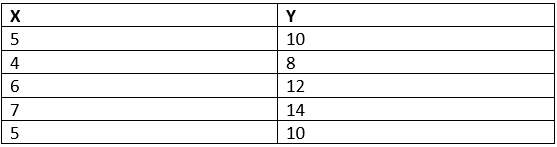

a.	Tentukan nilai alpha variabel (nilai a dan b pada persamaan y=ax+b) dengan Least Square Method


In [79]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([5, 4, 6, 7, 5])
Y = np.array([10, 8, 12, 14, 10])

A = np.vstack([X, np.ones(len(X))]).T
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)), Y)
print(alpha)

[ 2.00000000e+00 -3.55271368e-15]


b.	Buatlah plot hasil regresi kalian bersama dengan titik-titik pada soal

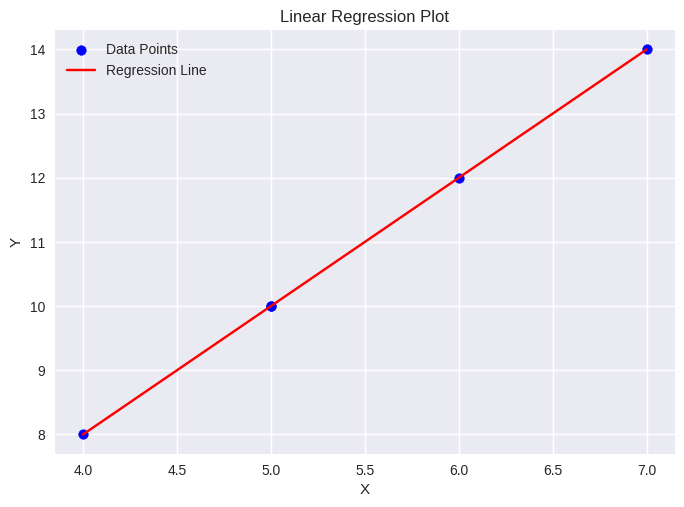

In [80]:
plt.scatter(X, Y, color='blue', label='Data Points')

X_line = np.linspace(min(X), max(X), 100)
Y_line = alpha[0] * X_line + alpha[1]

plt.plot(X_line, Y_line, color='red', label='Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Plot')

plt.legend()
plt.show()